In [16]:

import numpy as np 
import csv
import statistics as st

archivo = open("../test/train.csv")

csvreader = csv.reader(archivo)

header = []
header = next(csvreader)

XTrainTodo = []
for row in csvreader:
        XTrainTodo.append(row) #Lista entera del csv sin headers



In [10]:
import  subprocess
def correrPrograma(PCABool, k, alpha):
    comando = []
    comando.append("./main")
    comando.append(str(PCABool))
    comando.append(str(k))
    comando.append(str(alpha))
    #comando.append(str(epsilon))
    comando.append('trainPartido.csv')
    comando.append('testPartido.csv' )
    #comando.append("resultado.csv")
    result = subprocess.run(comando, stdout = subprocess.PIPE, encoding = 'ascii')
    return float(result.stdout.split('\n')[0])
    
    
    

In [11]:
def calcularAcc():
    resComp = open("../test/resultados.csv")
    expected = open("../test/expectedPartido.csv")
    resCompRead = csv.reader(resComp)
    expRead = csv.reader(expected)
    vExp = []
    vComp = []
    for i in expRead:
        vExp.append(i)
    for i in resCompRead:
        vComp.append(i)
    res = 0
    i = 0
    while i < len(vExp):
        if vExp[i] == vComp [i]:
            res = res + 1
        i = i + 1
    resComp.close()
    expected.close()
    return (res/i)*100
    
ca = calcularAcc()

In [23]:
import csv
def calcularPrecRec():
    resComp = open("../test/resultados.csv")
    expected = open("../test/expectedPartido.csv")
    resCompRead = csv.reader(resComp)
    expRead = csv.reader(expected)
    vExp = []
    vComp = []
    for i in expRead:
        vExp.append(i)
    for i in resCompRead:
        vComp.append(i)
    res = 0
    i = 0
    prec = []
    recall = []
    for j in range(10):
        tp = 0
        tn = 0
        fp = 0
        fn = 0
        tmpP = 0
        tmpR = 0
        for i in range(len(vExp)):
            if int(vExp[i][0]) == j: 
                if int(vExp[i][0]) == int(vComp [i][0]):
                    tp = tp + 1
                else:
                    fn = fn + 1
            else:
                
                if j != int(vComp [i][0]):
                    tn = tn + 1
                else:
                    fp = fp + 1
        tmpP = tp/(tp + fp) * 100
        tmpR = tp/(tp + fn) * 100
        prec.append(tmpP)
        recall.append(tmpR)
    resComp.close()
    expected.close()
    return prec, recall
resPrec,resRec = calcularPrecRec()
print(resPrec)
print(resRec)

[98.3173076923077, 98.71794871794873, 99.27007299270073, 98.16933638443935, 98.75930521091811, 96.91516709511568, 96.81818181818181, 97.36842105263158, 96.93877551020408, 95.61855670103093]
[99.27184466019418, 99.56896551724138, 98.3132530120482, 96.83972911963883, 95.90361445783132, 96.1734693877551, 98.61111111111111, 99.10714285714286, 96.20253164556962, 96.61458333333334]


In [79]:
import  subprocess
import random

def kfold(xTrainParticion,folds,knn,pca,alfas):
    resAc = []
    resTime = []
    resPrec = []
    resRec = []
    random.shuffle(xTrainParticion)
    for i in range(folds):
        fTrain = open('../test/trainPartido.csv', 'w')
        fTest = open('../test/testPartido.csv','w')
        fExpected = open('../test/expectedPartido.csv','w')
        writerTrain = csv.writer(fTrain)
        writerTest = csv.writer(fTest)
        writerExpected = csv.writer(fExpected)
        desde = (i * len(xTrainParticion))//folds
        hasta = (((i+1) * len(xTrainParticion))//folds)-1
        for j in range (len(xTrainParticion)):
            if (j < desde or j > hasta):
                writerTrain.writerow(xTrainParticion[j])
            else:
                writerTest.writerow(xTrainParticion[j][1:])
                writerExpected.writerow(xTrainParticion[j][0])
        fTrain.close()
        fTest.close()
        fExpected.close()
        resTime.append(correrPrograma(pca,knn,alfas))
        resAc.append(calcularAcc())
        tempPrec, tempRec = calcularPrecRec()
        resPrec.append(tempPrec)
        resRec.append(tempRec)
    return resAc, resTime, resPrec, resRec
        
xTrainParticion = XTrainTodo

#resultadoAcc5, resultadosTime5, resultadosPrec5, resultadosRec5 = kfold(xTrainParticion, 5, 4, 1, 38)
expAlfaMasPreciso = []
for alfa in range (35,41):
    tempAcc, tempTime, tempPrec, tempRec = kfold(xTrainParticion, 5,4,1,alfa)
    expAlfaMasPreciso.append(tempAcc)
print(expAlfaMasPreciso)


[[97.51190476190476, 97.54761904761905, 97.76190476190476, 97.48809523809524, 97.60714285714286], [97.54761904761905, 97.33333333333334, 97.78571428571429, 97.42857142857143, 97.59523809523809], [97.64285714285714, 97.73809523809524, 97.42857142857143, 97.47619047619047, 97.39285714285715], [97.52380952380952, 97.45238095238096, 97.61904761904762, 97.57142857142857, 97.58333333333333], [97.52380952380952, 97.39285714285715, 97.67857142857143, 97.5, 97.61904761904762], [97.57142857142857, 97.33333333333334, 97.46428571428571, 97.73809523809524, 97.3452380952381]]


In [82]:
#prrints
#print(resultadoAcc)
#print(resultadosTime)
#print(resultadosPrec)
#print(resultadosRec)
expAlfaMasPrecisoProm = listAv(expAlfaMasPreciso)
resultadoAccExp5 = [97.42857142857143, 97.76190476190476, 97.66666666666667, 97.66666666666667, 97.85714285714285, 97.80952380952381, 97.42857142857143, 97.83333333333334, 97.28571428571429, 97.35714285714285]
resultadosTimeExp5 = [29.43, 23.3515, 24.9743, 23.5548, 23.916, 24.9122, 23.703, 24.3769, 22.7871, 24.7258]
resultadosPrecExp5 = [[97.83653846153845, 98.31932773109243, 97.41784037558685, 97.35449735449735, 98.13084112149532, 98.38709677419355, 97.65807962529274, 97.05263157894737, 97.40932642487047, 94.71153846153845], [98.3132530120482, 99.16666666666667, 98.40182648401826, 97.81553398058253, 96.82539682539682, 98.22335025380711, 97.98206278026906, 96.94835680751174, 98.69109947643979, 95.1048951048951], [98.83990719257541, 98.08917197452229, 98.56459330143541, 96.69811320754717, 98.52579852579852, 96.91011235955057, 97.98488664987406, 96.48760330578511, 98.9795918367347, 95.71428571428572], [98.34905660377359, 97.78672032193158, 97.21577726218096, 98.13953488372093, 98.75311720698254, 97.6, 97.79411764705883, 97.24770642201835, 98.47715736040608, 95.29702970297029], [99.52830188679245, 98.09725158562368, 98.54014598540147, 97.60869565217392, 98.12646370023418, 95.75596816976127, 97.9539641943734, 97.16981132075472, 98.0722891566265, 97.48743718592965], [97.1938775510204, 97.66949152542372, 98.41986455981942, 98.58156028368793, 98.75311720698254, 97.92746113989638, 98.03439803439802, 97.47706422018348, 98.30097087378641, 95.7943925233645], [97.9002624671916, 99.34782608695653, 98.32935560859188, 97.22222222222221, 97.14285714285714, 97.6923076923077, 98.09976247030879, 96.14512471655328, 96.4769647696477, 95.82366589327145], [99.12663755458514, 97.73242630385488, 98.89807162534436, 96.34703196347031, 98.73096446700508, 96.8668407310705, 98.14814814814815, 98.03063457330416, 97.99498746867168, 96.55172413793103], [99.24242424242425, 97.97570850202429, 97.86729857819904, 97.48858447488584, 97.35449735449735, 95.8005249343832, 96.11872146118722, 98.0295566502463, 98.07692307692307, 94.89559164733178], [98.812351543943, 97.83549783549783, 97.68041237113401, 96.93396226415094, 98.0392156862745, 96.98630136986301, 97.43589743589743, 98.40546697038725, 97.42388758782201, 94.05034324942791]]
resultadosRecExp5 = [[99.26829268292683, 99.15254237288136, 97.6470588235294, 94.84536082474226, 96.55172413793103, 95.3125, 99.04988123515439, 97.87685774946921, 97.91666666666666, 96.09756097560975], [99.27007299270073, 98.55072463768117, 98.62700228832952, 97.34299516908213, 98.12332439678283, 96.99248120300751, 99.31818181818181, 97.86729857819904, 95.68527918781726, 95.5503512880562], [99.3006993006993, 99.14163090128756, 98.09523809523809, 95.57109557109557, 97.09443099273608, 96.91011235955057, 99.74358974358975, 98.3157894736842, 95.56650246305419, 96.63461538461539], [99.04988123515439, 99.18367346938776, 98.82075471698113, 97.01149425287356, 97.05882352941177, 97.08222811671088, 98.76237623762376, 96.36363636363636, 96.75810473815461, 96.25], [99.29411764705883, 99.14529914529915, 98.06295399515739, 96.35193133047211, 99.05437352245863, 97.30458221024259, 98.71134020618557, 98.8009592326139, 94.87179487179486, 97.0], [98.96103896103897, 98.92703862660944, 96.67405764966742, 96.52777777777779, 98.01980198019803, 97.92746113989638, 99.0074441687345, 97.70114942528735, 96.88995215311004, 97.61904761904762], [98.67724867724867, 99.78165938864629, 97.16981132075472, 96.39830508474576, 96.6824644549763, 97.1938775510204, 98.80382775119617, 97.92147806004618, 96.73913043478261, 94.94252873563218], [99.56140350877193, 99.76851851851852, 97.82016348773843, 96.12756264236903, 98.23232323232324, 97.12041884816755, 99.06542056074767, 98.24561403508771, 95.59902200488997, 96.55172413793103], [98.74371859296483, 98.77551020408163, 97.1764705882353, 95.95505617977528, 96.58792650918635, 95.8005249343832, 99.29245283018868, 97.07317073170731, 96.0, 97.14964370546319], [99.28400954653938, 98.47494553376906, 96.9309462915601, 95.35962877030161, 95.92326139088729, 96.45776566757493, 99.2874109263658, 97.73755656108597, 96.96969696969697, 96.93396226415094]]
promResultadoAcc20 = st.mean(resultadoAcc20)

print(st.mean(resultadoAccExp5))
print(st.mean(resultadoAcc5))
resultadosPrec
expAlfaMasPrecisoProm

97.60952380952381
97.45476190476191


[97.58333333333333,
 97.53809523809524,
 97.53571428571429,
 97.54999999999998,
 97.54285714285716,
 97.49047619047619]

In [44]:
#Calculo recall o presicion por digito y saco promedio por digito, debemos permutar pq no supimos como arreglar este primer def 

def crearListaDeListasTamaño(n):
    res = []
    for i in range(n):
        res.append([])
    return res


def recallorPrecDigitosExp4 (resExp4):
    listaDeResDeDigitos = crearListaDeListasTamaño(10)
    res = []
    for fold in resExp4:
        for numero in range(len(fold)):
            listaDeResDeDigitos[numero].append(fold[numero])
    for digitosRecPrec in listaDeResDeDigitos:
        res.append(st.mean(digitosRecPrec))
    return res

def listaDeListasDeRecPrecDeCadaDigitoPorFold (res5exp4,res10exp4,res20exp4):
    res = crearListaDeListasTamaño(10)
    for i in range(10):
        res[i].append(res5exp4[i])
        res[i].append(res10exp4[i])
        res[i].append(res20exp4[i])
    return res

def recallorprecPorDigito(resTengo):
    res = []
    for i in resTengo:
        lstProm = []
        for yacar in range(10):
            prom = []
            for skako in range(len(i)):
                prom.append(i[skako][yacar])
            lstProm.append(st.mean(prom))
        res.append(lstProm)
    return res

def permutarListas(resTengoHorror):
    res = [[],[],[],[],[],[],[],[],[],[]]
    for salto in resTengoHorror:
        for digito in range(len(salto)):
            res[digito].append(salto[digito])
    return res
#print(recallorPrecDigitosExp4(resultadosPrec5)) # 5 
#print(recallorPrecDigitosExp4(resultadosPrec)) # 10 folds
#print(recallorPrecDigitosExp4(resultadosPrec20)) # 20
#print(recallorPrecDigitosExp4(resultadosRec5)) # 5
#print(recallorPrecDigitosExp4(resultadosRec)) # 10 folds 
#print(recallorPrecDigitosExp4(resultadosRec20)) # 20


listaExp4PlotRec = listaDeListasDeRecPrecDeCadaDigitoPorFold(recallorPrecDigitosExp4(resultadosPrec5), recallorPrecDigitosExp4(resultadosPrec), recallorPrecDigitosExp4(resultadosPrec20))
listaExp4PlotPrec = listaDeListasDeRecPrecDeCadaDigitoPorFold(recallorPrecDigitosExp4(resultadosRec5),recallorPrecDigitosExp4(resultadosRec), recallorPrecDigitosExp4(resultadosRec20))

In [81]:
def Average(lst): 
    return sum(lst) / len(lst) 
def listAv(lst):
    res = []
    for i in lst:
        res.append(Average(i))
    return res

def lofloflav(lst):
    res = []
    for i in lst:
        res.append(listAv(i))
    return res

def listOfListOfListAv(lst):
    res = []
    i = 0
    while i < len(lst):
        temp = []
        j = 0
        while j < len(lst[i]):
            agregar = Average(lst[i][j])
            j = j + 1
            temp.append(agregar)
        i = i + 1
        res.append(temp)
    return res

In [98]:
resAc3a30 = [[96.96392427669961, 96.88058102155019, 96.4281462078819, 96.51148946303131, 97.09489224907728], [96.85676866293606, 96.61864507679485, 96.6662697940231, 96.51148946303131, 97.1187046076914], [96.53530182164543, 96.53530182164543, 96.2138349803548, 96.23764733896893, 96.80914394570782], [96.30908441481128, 96.39242766996071, 96.04714847005596, 96.41624002857483, 96.48767710441719], [96.01142993213477, 96.17811644243362, 95.73758780807239, 96.02333611144184, 96.1543040838195], [95.83283724252887, 95.96380521490654, 95.68996309084415, 95.97571139421359, 96.07096082867008], [95.60661983569473, 95.74949398737945, 95.41612096678176, 95.66615073223002, 95.73758780807239], [95.51137040123824, 95.65424455292296, 95.26134063578996, 95.42802714608882, 95.63043219430884], [95.41612096678176, 95.3446838909394, 94.93987379449933, 95.35659007024645, 95.39230860816764], [95.23752827717585, 95.18990355994761, 94.80890582212169, 95.27324681509704, 95.27324681509704]]
resTime3a30 = [[465.916, 465.302, 465.449, 465.021, 464.216], [465.819, 464.657, 465.235, 465.316, 464.903], [464.727, 465.008, 462.137, 464.079, 462.905], [464.917, 463.502, 463.755, 464.816, 465.899], [465.46, 466.028, 464.409, 463.785, 465.752], [465.53, 464.883, 463.811, 461.309, 458.279], [457.8, 455.0, 466.492, 461.289, 445.201], [447.732, 451.116, 451.859, 455.063, 455.571], [447.357, 447.032, 447.205, 441.787, 442.03], [443.709, 441.352, 444.019, 445.188, 444.029]]
resAcknn1 = [96.65436361471603, 96.77342540778665, 96.26145969758304, 96.6662697940231, 96.73770686986546]
resTimeKnn1 = [466.01, 443.152, 437.98, 447.088, 434.353]
resAc1y10A100Salto10y200a700Saltos100y784 = [[26.038814144541018, 25.336349565424456, 25.574473151565662, 25.657816406715085, 27.3961185855459], [92.23717109179664, 92.15382783664722, 91.74901774020718, 92.38004524348136, 92.43957614001667], [96.86867484224312, 97.03536135254197, 96.451958566496, 96.64245743540899, 96.99964281462078], [97.54732706274557, 97.63067031789498, 96.95201809739254, 97.13061078699845, 97.5116085248244], [97.5354208834385, 97.64257649720204, 97.08298606977021, 97.10679842838434, 97.49970234551732], [97.49970234551732, 97.5949517799738, 97.04726753184903, 97.14251696630552, 97.5354208834385], [97.47588998690321, 97.46398380759615, 97.04726753184903, 97.10679842838434, 97.42826526967497], [97.28539111799024, 97.45207762828908, 96.95201809739254, 96.95201809739254, 97.36873437313966], [97.34492201452554, 97.3568281938326, 96.98773663531372, 96.844862483629, 97.30920347660435], [97.33301583521849, 97.26157875937612, 96.97583045600666, 96.70198833194428, 97.3568281938326], [97.32110965591141, 97.21395404214788, 96.92820573877843, 96.71389451125134, 97.24967258006906], [97.1187046076914, 97.05917371115609, 96.6067388974878, 96.59483271818074, 97.21395404214788], [96.91629955947137, 96.98773663531372, 96.46386474580308, 96.57102035956662, 97.17823550422669], [97.01154899392785, 96.88058102155019, 96.4281462078819, 96.52339564233837, 97.15442314561258], [96.98773663531372, 96.91629955947137, 96.44005238718894, 96.51148946303131, 97.10679842838434], [96.97583045600666, 96.88058102155019, 96.44005238718894, 96.51148946303131, 97.09489224907728], [96.97583045600666, 96.88058102155019, 96.451958566496, 96.46386474580308, 97.09489224907728], [97.20204786284081, 97.16632932491963, 96.67817597333016, 96.67817597333016, 97.237766400762]]
resTime1y10A100Salto10y200a700Saltos100y784 = [[9.43398, 9.82689, 9.82074, 9.74816, 9.48312], [14.7528, 15.1394, 14.9124, 14.9074, 15.3088], [19.7297, 20.0871, 20.5557, 20.8581, 19.8556], [28.5021, 27.6336, 27.9935, 28.6027, 27.4218], [40.6876, 39.419, 39.2614, 40.4782, 39.285], [46.3398, 46.346, 45.9978, 47.2688, 45.406], [53.8731, 53.2061, 54.457, 52.7583, 52.7424], [60.0644, 60.6016, 58.3691, 59.7892, 58.6017], [66.2595, 64.0035, 64.2711, 65.4276, 64.4357], [72.4288, 76.3331, 73.0874, 74.1887, 68.9918], [79.9387, 79.5286, 79.523, 83.3246, 80.0787], [191.852, 194.642, 191.113, 211.155, 219.927], [377.487, 359.782, 366.127, 360.084, 362.566], [494.689, 497.04, 548.061, 515.793, 519.661], [601.334, 628.845, 660.546, 603.878, 623.279], [740.08, 751.928, 716.971, 732.387, 756.552], [848.094, 845.682, 844.407, 845.168, 835.502], [1018.32, 1012.77, 1012.25, 1019.02, 1002.59]]
resAc20a70Saltos2PCA = [[96.86867484224312, 97.03536135254197, 96.451958566496, 96.64245743540899, 96.99964281462078], [97.30920347660435, 97.27348493868317, 96.65436361471603, 96.76151922847957, 97.1187046076914], [97.2972972972973, 97.42826526967497, 96.59483271818074, 96.94011191808548, 97.10679842838434], [97.47588998690321, 97.40445291106084, 96.86867484224312, 97.03536135254197, 97.2972972972973], [97.48779616621026, 97.45207762828908, 96.99964281462078, 97.02345517323491, 97.3568281938326], [97.54732706274557, 97.63067031789498, 96.95201809739254, 97.13061078699845, 97.5116085248244], [97.61876413858793, 97.65448267650912, 96.96392427669961, 97.16632932491963, 97.42826526967497], [97.5116085248244, 97.7735444695797, 96.95201809739254, 97.237766400762, 97.49970234551732], [97.54732706274557, 97.72591975235147, 96.98773663531372, 97.22586022145494, 97.58304560066675], [97.60685795928087, 97.69020121443029, 97.02345517323491, 97.17823550422669, 97.58304560066675], [97.5354208834385, 97.64257649720204, 97.08298606977021, 97.10679842838434, 97.49970234551732], [97.5354208834385, 97.5949517799738, 96.98773663531372, 97.16632932491963, 97.48779616621026], [97.48779616621026, 97.52351470413144, 96.97583045600666, 97.14251696630552, 97.46398380759615], [97.46398380759615, 97.49970234551732, 96.97583045600666, 97.13061078699845, 97.47588998690321], [97.54732706274557, 97.54732706274557, 97.03536135254197, 97.07107989046315, 97.54732706274557], [97.49970234551732, 97.5949517799738, 97.04726753184903, 97.14251696630552, 97.5354208834385], [97.48779616621026, 97.5354208834385, 97.10679842838434, 97.08298606977021, 97.39254673175378], [97.48779616621026, 97.47588998690321, 97.09489224907728, 97.10679842838434, 97.45207762828908], [97.45207762828908, 97.46398380759615, 97.07107989046315, 97.07107989046315, 97.39254673175378], [97.42826526967497, 97.45207762828908, 97.04726753184903, 97.08298606977021, 97.38064055244672], [97.47588998690321, 97.46398380759615, 97.04726753184903, 97.10679842838434, 97.42826526967497], [97.30920347660435, 97.47588998690321, 97.04726753184903, 97.15442314561258, 97.33301583521849], [97.36873437313966, 97.44017144898203, 96.99964281462078, 97.04726753184903, 97.30920347660435], [97.34492201452554, 97.46398380759615, 96.97583045600666, 96.97583045600666, 97.30920347660435], [97.32110965591141, 97.3568281938326, 96.99964281462078, 96.89248720085725, 97.36873437313966], [97.28539111799024, 97.45207762828908, 96.95201809739254, 96.95201809739254, 97.36873437313966]]
#saltamos alphas de a 3 de 30 a 50 inclusive y cada lista es del k usado (de 1 a 5 inclusive)
resKAcExperimento3 = resKAc
resKTimeExperimento3 = resKTime
resKAcExp3Prom = lofloflav(resKAcExperimento3 )
resKTimeExp3Prom = lofloflav(resKTimeExperimento3)
resExp4Res = [[80.0, 81.0, 84.0, 84.0, 83.0], [88.5, 91.5, 90.5, 92.75, 93.5], [93.89999999999999, 94.1, 93.89999999999999, 95.0, 94.5], [95.8, 96.2, 95.19999999999999, 95.5, 96.0], [96.03333333333333, 96.8, 96.86666666666667, 96.43333333333334, 96.5], [96.65, 97.175, 97.275, 97.25, 97.175], [97.2, 97.18, 97.2, 96.94, 97.2], [97.18333333333334, 97.21666666666667, 97.21666666666667, 97.16666666666667, 97.55], [97.35000000000001, 97.6875, 97.32499999999999, 97.35000000000001, 97.625]]
resExp4Time = [[4.49824, 3.66007, 4.65898, 4.62014, 3.71029], [3.49561, 3.87108, 3.74191, 4.21249, 3.79062], [5.65616, 4.67104, 4.65571, 4.42986, 5.63183], [7.01144, 5.50151, 5.93896, 7.26062, 7.26644], [8.1189, 6.71977, 7.09757, 7.90544, 7.68635], [10.2848, 10.1692, 9.88446, 9.8449, 12.1817], [14.9223, 14.6885, 15.3927, 17.7006, 15.812], [20.0053, 21.2218, 20.911, 20.6072, 21.4142], [28.2407, 27.8843, 27.9535, 27.7673, 27.6814]]
resExp4Prec = [[[23.076923076923077, 23.076923076923077, 42.857142857142854, 35.714285714285715, 21.73913043478261, 33.33333333333333, 29.166666666666668, 40.0, 29.629629629629626, 25.0], [33.33333333333333, 24.0, 27.27272727272727, 37.03703703703704, 40.0, 18.181818181818183, 40.625, 25.0, 21.73913043478261, 48.0], [46.15384615384615, 40.0, 47.61904761904761, 31.818181818181817, 30.0, 33.33333333333333, 36.0, 36.0, 28.57142857142857, 36.36363636363637], [46.42857142857143, 46.42857142857143, 34.78260869565217, 31.818181818181817, 45.45454545454545, 37.5, 27.77777777777778, 25.0, 30.0, 34.78260869565217], [41.37931034482759, 43.333333333333336, 44.827586206896555, 23.52941176470588, 36.36363636363637, 23.809523809523807, 23.809523809523807, 36.36363636363637, 36.36363636363637, 30.434782608695656]], [[43.037974683544306, 48.837209302325576, 38.88888888888889, 45.83333333333333, 51.24999999999999, 48.0, 45.78313253012048, 43.42105263157895, 42.1875, 51.85185185185185], [52.23880597014925, 56.41025641025641, 63.1578947368421, 42.3728813559322, 49.2063492063492, 49.2063492063492, 57.692307692307686, 57.35294117647059, 57.89473684210527, 55.55555555555556], [49.29577464788733, 54.43037974683544, 61.1764705882353, 47.61904761904761, 45.3125, 53.62318840579711, 53.65853658536586, 52.054794520547944, 48.38709677419355, 42.857142857142854], [60.273972602739725, 64.1025641025641, 62.295081967213115, 56.25, 58.333333333333336, 54.09836065573771, 56.92307692307692, 57.8125, 55.00000000000001, 59.67741935483871], [62.68656716417911, 55.932203389830505, 69.11764705882352, 61.111111111111114, 67.12328767123287, 57.692307692307686, 62.857142857142854, 57.99999999999999, 57.14285714285714, 59.32203389830508]], [[61.875, 64.28571428571429, 67.72151898734177, 63.6986301369863, 61.06870229007634, 58.91472868217055, 63.69047619047619, 63.29113924050633, 61.15702479338842, 63.758389261744966], [64.84848484848484, 67.05202312138728, 67.90123456790124, 61.65413533834586, 61.59420289855072, 64.93506493506493, 62.58064516129033, 56.19834710743802, 58.59375, 70.62937062937063], [63.1578947368421, 64.70588235294117, 66.02564102564102, 63.08724832214765, 63.26530612244898, 59.541984732824424, 62.58064516129033, 66.0493827160494, 62.676056338028175, 58.06451612903226], [69.07894736842105, 66.43356643356644, 66.90647482014388, 62.7906976744186, 66.92307692307692, 69.62025316455697, 69.23076923076923, 67.88321167883211, 75.177304964539, 62.60869565217392], [58.91472868217055, 69.76744186046511, 67.14285714285714, 66.88741721854305, 66.43356643356644, 60.97560975609756, 64.93506493506493, 70.12987012987013, 62.77372262773723, 65.69343065693431]], [[71.01449275362319, 73.98119122257053, 72.79411764705883, 69.34865900383141, 71.20622568093385, 69.6, 70.60931899641577, 70.73170731707317, 72.76422764227642, 74.43609022556392], [73.10606060606061, 74.11347517730496, 73.60594795539033, 75.82417582417582, 73.38403041825094, 68.0, 73.10606060606061, 76.8166089965398, 75.32467532467533, 73.38709677419355], [68.97689768976898, 67.48251748251748, 72.63513513513513, 68.92430278884463, 68.97810218978103, 70.47970479704797, 67.36111111111111, 68.53146853146853, 65.33864541832669, 68.70229007633588], [68.98954703832753, 72.16494845360825, 69.73180076628353, 73.11827956989248, 68.25396825396825, 65.58704453441295, 71.09634551495017, 71.86440677966101, 71.81467181467181, 68.54838709677419], [70.19607843137254, 74.91749174917491, 73.6462093862816, 72.58687258687259, 72.50996015936255, 71.98443579766537, 71.00371747211895, 73.18007662835248, 71.78423236514523, 74.90636704119851]], [[70.33248081841433, 75.36842105263158, 70.0, 73.65728900255755, 73.82716049382717, 71.42857142857143, 72.36533957845434, 75.17899761336515, 72.54901960784314, 73.224043715847], [75.97911227154047, 79.16666666666666, 78.62595419847328, 78.76344086021506, 77.27272727272727, 74.70930232558139, 76.33587786259542, 77.10526315789473, 78.57142857142857, 73.27327327327328], [75.93582887700535, 77.53623188405797, 78.13333333333333, 78.83597883597884, 77.31092436974791, 75.31645569620254, 76.2532981530343, 78.33753148614609, 76.92307692307693, 79.31873479318735], [73.81546134663341, 75.52941176470588, 75.25773195876289, 76.64041994750657, 72.8021978021978, 75.0, 73.65728900255755, 74.73684210526315, 76.03305785123968, 76.74418604651163], [73.65728900255755, 77.93103448275862, 77.01711491442543, 76.12359550561798, 76.40750670241286, 72.72727272727273, 73.79134860050891, 75.31806615776081, 75.28089887640449, 75.13089005235602]], [[74.36399217221134, 77.14285714285715, 75.42016806722688, 77.00205338809035, 76.17107942973523, 75.16198704103671, 76.05118829981718, 78.06215722120659, 75.66462167689161, 76.84630738522954], [78.4708249496982, 79.89031078610603, 78.61507128309573, 82.35294117647058, 79.71311475409836, 78.34821428571429, 78.1496062992126, 79.91967871485943, 77.42663656884876, 79.21225382932167], [78.49898580121703, 82.4742268041237, 80.53830227743272, 81.60919540229885, 80.55555555555556, 77.80320366132723, 78.07933194154488, 79.03563941299791, 78.4090909090909, 80.65934065934066], [77.3784355179704, 81.4748201438849, 81.640625, 79.79381443298969, 78.8135593220339, 77.83018867924528, 78.76984126984127, 80.36072144288578, 80.24948024948026, 80.16877637130801], [78.0439121756487, 80.14705882352942, 78.95791583166333, 79.44915254237289, 78.01268498942918, 77.728285077951, 77.68762677484787, 80.47808764940238, 81.95329087048833, 80.0]], [[77.66830870279146, 79.46026986506747, 79.84615384615384, 81.84713375796179, 80.33333333333333, 77.17391304347827, 77.68456375838926, 81.06416275430361, 79.0909090909091, 79.4912559618442], [78.28843106180665, 81.2051649928264, 78.36065573770492, 80.35087719298247, 79.3929712460064, 77.33812949640287, 78.76386687797148, 78.68852459016394, 79.03780068728523, 81.13821138211382], [78.13021702838063, 81.49134487350199, 79.73856209150327, 80.86124401913875, 78.10858143607706, 77.25563909774436, 79.15407854984893, 80.20134228187919, 79.21635434412265, 79.073756432247], [77.74436090225564, 77.65793528505392, 77.85123966942149, 79.87321711568937, 77.33990147783251, 77.55775577557755, 74.66216216216216, 80.29411764705883, 77.25752508361204, 78.09847198641766], [77.31092436974791, 80.67349926793558, 80.13029315960912, 80.623973727422, 78.93864013266997, 77.797513321492, 80.06134969325154, 79.29936305732484, 80.4753820033956, 78.42465753424658]], [[77.13498622589532, 80.81048867699643, 79.31972789115646, 79.9151343705799, 80.64085447263018, 77.11213517665131, 78.69742198100407, 80.28909329829173, 79.46175637393767, 79.21727395411607], [77.22222222222223, 80.8252427184466, 79.67479674796748, 81.0918774966711, 78.22222222222223, 78.56115107913669, 78.48605577689243, 80.36410923276983, 79.69187675070029, 80.6312769010043], [76.8361581920904, 80.5115712545676, 79.27677329624478, 80.78484438430311, 80.7017543859649, 78.53025936599424, 78.01608579088472, 80.59508408796894, 79.5355587808418, 80.02832861189802], [79.38931297709924, 79.67581047381546, 79.35656836461126, 80.37889039242219, 79.32432432432432, 76.68231611893583, 78.16711590296495, 79.72972972972973, 79.31526390870185, 79.72413793103448], [81.96078431372548, 82.1969696969697, 81.97831978319783, 83.31015299026426, 79.59814528593509, 80.4733727810651, 81.21621621621622, 82.06521739130434, 80.90225563909775, 81.51862464183381]], [[79.21810699588477, 81.21546961325967, 80.34447821681864, 82.07920792079207, 79.42477876106194, 78.35648148148148, 79.65587044534414, 81.28772635814889, 80.0, 81.19022316684378], [81.69734151329243, 83.14500941619586, 83.48813209494324, 83.42077649527808, 82.05128205128204, 80.61104582843713, 81.08974358974359, 82.38341968911918, 83.07522123893806, 83.15334773218143], [78.77263581488934, 81.58379373848987, 79.45205479452055, 81.12407211028632, 79.42477876106194, 79.87012987012987, 79.35222672064778, 81.34615384615384, 80.48523206751055, 80.02136752136752], [78.51153039832285, 81.48820326678766, 80.06230529595015, 82.6086956521739, 80.57630736392743, 77.72778402699663, 78.860103626943, 80.6829268292683, 80.67940552016985, 81.63693599160545], [81.33874239350912, 82.38636363636364, 81.41025641025641, 83.36820083682008, 81.83760683760684, 81.82844243792326, 80.7967313585291, 82.96593186372746, 81.91365227537923, 82.47311827956989]]]
resExp4Rec = [[[100.0, 100.0, 75.0, 83.33333333333334, 71.42857142857143, 66.66666666666666, 70.0, 85.71428571428571, 88.88888888888889, 75.0], [90.0, 100.0, 66.66666666666666, 83.33333333333334, 71.42857142857143, 80.0, 100.0, 85.71428571428571, 83.33333333333334, 66.66666666666666], [85.71428571428571, 90.9090909090909, 66.66666666666666, 87.5, 75.0, 77.77777777777779, 100.0, 100.0, 85.71428571428571, 80.0], [92.85714285714286, 92.85714285714286, 88.88888888888889, 87.5, 71.42857142857143, 90.0, 62.5, 83.33333333333334, 75.0, 88.88888888888889], [100.0, 100.0, 92.85714285714286, 50.0, 72.72727272727273, 83.33333333333334, 83.33333333333334, 72.72727272727273, 72.72727272727273, 87.5]], [[97.14285714285714, 95.45454545454545, 93.33333333333333, 82.5, 85.41666666666666, 83.72093023255815, 97.43589743589743, 91.66666666666666, 75.0, 85.71428571428571], [94.5945945945946, 100.0, 88.88888888888889, 100.0, 93.93939393939394, 93.93939393939394, 97.82608695652173, 88.63636363636364, 76.74418604651163, 85.36585365853658], [94.5945945945946, 95.55555555555556, 91.22807017543859, 85.71428571428571, 90.625, 86.04651162790698, 100.0, 92.6829268292683, 83.33333333333334, 80.0], [100.0, 98.0392156862745, 86.36363636363636, 77.14285714285715, 89.74358974358975, 97.05882352941177, 97.36842105263158, 94.87179487179486, 94.28571428571428, 90.2439024390244], [97.67441860465115, 100.0, 90.38461538461539, 86.8421052631579, 96.07843137254902, 88.23529411764706, 100.0, 85.29411764705883, 94.11764705882352, 94.5945945945946]], [[100.0, 99.08256880733946, 91.45299145299145, 92.07920792079209, 88.88888888888889, 90.47619047619048, 100.0, 97.0873786407767, 84.0909090909091, 93.13725490196079], [99.07407407407408, 98.30508474576271, 94.01709401709401, 91.11111111111111, 93.4065934065934, 95.23809523809523, 98.9795918367347, 91.8918918918919, 92.5925925925926, 85.59322033898306], [95.04950495049505, 99.09909909909909, 92.7927927927928, 94.0, 93.0, 90.69767441860465, 97.0, 94.69026548672566, 91.75257731958763, 88.88888888888889], [97.22222222222221, 97.9381443298969, 95.87628865979381, 97.59036144578313, 92.5531914893617, 98.21428571428571, 98.18181818181819, 93.93939393939394, 87.60330578512396, 91.13924050632912], [97.43589743589743, 97.5609756097561, 91.2621359223301, 95.28301886792453, 93.13725490196079, 91.46341463414635, 99.00990099009901, 92.3076923076923, 95.55555555555556, 91.83673469387756]], [[98.0, 99.57805907172997, 95.1923076923077, 97.83783783783784, 94.81865284974094, 95.6043956043956, 98.99497487437185, 93.54838709677419, 91.3265306122449, 92.5233644859813], [97.47474747474747, 98.58490566037736, 97.53694581280789, 95.39170506912443, 96.98492462311557, 97.45222929936305, 97.47474747474747, 96.1038961038961, 90.15544041450777, 94.79166666666666], [99.0521327014218, 98.46938775510205, 93.47826086956522, 90.57591623036649, 94.5, 92.27053140096618, 98.9795918367347, 97.02970297029702, 94.79768786127167, 92.78350515463917], [99.49748743718592, 95.8904109589041, 94.30051813471503, 93.15068493150685, 94.5054945054945, 97.0059880239521, 98.61751152073732, 96.80365296803653, 91.62561576354679, 93.4065934065934], [97.81420765027322, 98.26839826839827, 96.6824644549763, 95.43147208121827, 94.30051813471503, 95.85492227979275, 98.96373056994818, 95.02487562189054, 93.51351351351352, 93.89671361502347]], [[98.92086330935251, 99.44444444444444, 94.5945945945946, 94.73684210526315, 95.83333333333334, 95.32374100719424, 99.67741935483872, 95.45454545454545, 92.5, 92.73356401384083], [98.64406779661017, 98.27586206896551, 96.26168224299066, 94.51612903225806, 96.33333333333334, 96.61654135338345, 99.00990099009901, 97.01986754966887, 94.07894736842105, 97.21115537848605], [98.61111111111111, 99.68944099378882, 96.06557377049181, 95.51282051282051, 95.50173010380622, 93.7007874015748, 98.63481228668942, 97.4921630094044, 95.40636042402826, 97.31343283582089], [99.32885906040269, 99.07407407407408, 96.36963696369637, 94.19354838709677, 97.06959706959707, 95.59322033898306, 98.63013698630137, 96.27118644067797, 93.24324324324324, 94.5859872611465], [99.3103448275862, 97.41379310344827, 96.62576687116564, 93.12714776632302, 94.37086092715232, 96.60377358490567, 99.31506849315068, 97.36842105263158, 94.03508771929825, 96.63299663299664]], [[99.21671018276761, 98.63013698630137, 95.47872340425532, 94.45843828715365, 95.65217391304348, 94.82288828337875, 99.28400954653938, 96.82539682539682, 96.1038961038961, 95.53349875930522], [98.48484848484848, 99.31818181818181, 97.96954314720813, 95.59471365638767, 96.52605459057072, 95.64032697547684, 99.49874686716792, 96.83698296836984, 96.34831460674157, 95.26315789473684], [99.23076923076923, 98.56262833675564, 96.28712871287128, 97.03872437357631, 97.3621103117506, 96.5909090909091, 98.94179894179894, 97.66839378238342, 96.10027855153204, 94.58762886597938], [99.1869918699187, 98.47826086956522, 96.31336405529954, 96.99248120300751, 97.38219895287958, 95.37572254335261, 99.25, 97.09443099273608, 96.25935162094763, 95.95959595959596], [99.23857868020305, 98.86621315192744, 98.00995024875621, 95.9079283887468, 97.61904761904762, 96.40883977900553, 99.22279792746113, 96.4200477326969, 93.23671497584542, 96.85230024213075]], [[99.16142557651992, 99.43714821763602, 98.29545454545455, 95.18518518518519, 95.63492063492063, 96.81818181818181, 98.51063829787235, 96.46182495344506, 94.56521739130434, 97.84735812133071], [99.19678714859438, 98.26388888888889, 98.15195071868584, 94.04517453798768, 97.64243614931237, 96.62921348314607, 98.61111111111111, 97.75967413441956, 96.03340292275574, 95.22900763358778], [98.11320754716981, 99.836867862969, 96.82539682539682, 96.20493358633776, 96.74620390455532, 95.5813953488372, 99.61977186311786, 95.6, 96.27329192546584, 96.24217118997912], [99.04214559386973, 98.4375, 96.12244897959184, 95.09433962264151, 96.91358024691358, 96.50924024640656, 99.32584269662922, 96.63716814159292, 96.4509394572025, 95.0413223140496], [98.9247311827957, 98.56887298747765, 96.47058823529412, 95.71150097465888, 97.34151329243353, 96.68874172185431, 98.1203007518797, 98.03149606299213, 94.98997995991984, 97.03389830508475]], [[99.46714031971581, 98.83381924198251, 97.16666666666667, 95.4391891891892, 96.17834394904459, 96.16858237547893, 97.97297297297297, 96.98412698412699, 95.8974358974359, 97.50830564784053], [99.46332737030411, 98.66666666666667, 97.19008264462809, 96.05678233438486, 96.35036496350365, 96.80851063829788, 99.16107382550335, 97.47634069400631, 96.27749576988155, 94.61279461279462], [99.45155393053017, 98.95209580838323, 96.93877551020408, 95.98070739549838, 96.14147909967846, 96.80284191829485, 99.48717948717949, 97.34375, 95.47038327526133, 95.60067681895093], [98.73417721518987, 98.91640866873065, 97.36842105263158, 95.96122778675283, 97.18543046357617, 95.8904109589041, 98.63945578231292, 96.72131147540983, 95.69707401032701, 96.1730449251248], [98.58490566037736, 99.08675799086758, 97.73828756058158, 95.68690095846645, 97.16981132075472, 97.31663685152057, 98.68637110016421, 97.5767366720517, 96.415770609319, 96.9335604770017]], [[98.71794871794873, 99.10112359550561, 97.78051787916154, 96.3953488372093, 96.50537634408603, 96.43874643874643, 98.62155388471177, 96.88249400479616, 97.18670076726342, 95.61952440550688], [99.25465838509317, 99.32508436445444, 97.00239808153476, 96.71532846715328, 97.8343949044586, 97.16713881019831, 98.95697522816167, 98.14814814814815, 95.91315453384419, 96.37046307884856], [99.61832061068702, 98.44444444444444, 97.54204398447607, 95.50561797752809, 96.24664879356568, 96.34464751958225, 98.74055415617129, 97.6905311778291, 96.33838383838383, 96.52061855670104], [99.07407407407408, 99.11699779249447, 97.4715549936789, 94.77434679334917, 96.17834394904459, 98.01418439716312, 98.95968790637191, 98.33531510107015, 96.20253164556962, 95.4601226993865], [99.25742574257426, 99.54233409610984, 97.94344473007712, 96.25603864734299, 97.45547073791349, 96.15384615384616, 99.74779319041615, 97.64150943396226, 95.25101763907735, 96.59949622166248]]]



In [162]:
def Average(lst): 
    return sum(lst) / len(lst) 
def listAv(lst):
    res = []
    for i in lst:
        res.append(Average(i))
    return res
print(Average(resAcknn1))
listAv(resAc3a30)
resPromediosExpPCA = listAv(resAc1y10A100Salto10y200a700Saltos100y784)
resPromediosExpPCATime = listAv(resTime1y10A100Salto10y200a700Saltos100y784)
resPromediosExpPCA1a90Saltos10Time = resPromediosExpPCATime[1:10]
resPromedioExpPCA100a784Time = resPromediosExpPCATime[10:]
resPromediosExpPCA1a90Saltos10 = resPromediosExpPCA[1:10]
resPromedioExpPCA100a784 = resPromediosExpPCA[10:]
resPromediosExpPCA1a100Saltos10
PCASaltos = [10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,784]
resPromedioExpPCA100a784
PCASaltos100 = [100,200,300,400,500,600,700,784]
resPromAc20a702PCA = listAv(resAc20a70Saltos2PCA)
resPromAc20a702PCA
resAcKnn1a30Prom = listAv(resAc3a30)
resAcKnn1a30Prom.insert(0,Average(resAcknn1))
resAcKnn1a30Prom
resTimeKnn1a30Prom = listAv(resTime3a30)
resTimeKnn1a30Prom.insert(0,Average(resTimeKnn1))
resTimeKnn1a30Prom

96.61864507679486


NameError: name 'resPromediosExpPCA1a100Saltos10' is not defined

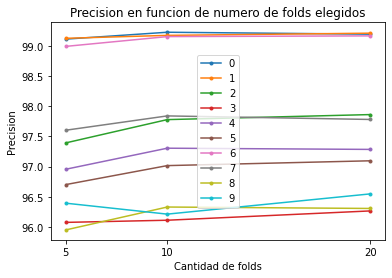

In [58]:
#Experimento 4 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
listaDeSalto = [5,10,20]
plt.plot(listaDeSalto, listaExp4PlotPrec[0], 'C0.-')
plt.title("Precision en funcion de numero de folds elegidos", )
plt.xlabel("Cantidad de folds")
plt.ylabel("Precision")
#plt.xlim(5,20)
plt.xticks([5,10,20])
plt.plot(listaDeSalto, listaExp4PlotPrec[1], 'C1.-')
plt.plot(listaDeSalto, listaExp4PlotPrec[2], 'C2.-')
plt.plot(listaDeSalto, listaExp4PlotPrec[3], 'C3.-')
plt.plot(listaDeSalto, listaExp4PlotPrec[4], 'C4.-')
plt.plot(listaDeSalto, listaExp4PlotPrec[5], 'C5.-')
plt.plot(listaDeSalto, listaExp4PlotPrec[6], 'C6.-')
plt.plot(listaDeSalto, listaExp4PlotPrec[7], 'C7.-')
plt.plot(listaDeSalto, listaExp4PlotPrec[8], 'C8.-')
plt.plot(listaDeSalto, listaExp4PlotPrec[9], 'C9.-')
plt.gca().legend(('0','1','2', '3', '4','5','6','7','8','9'))


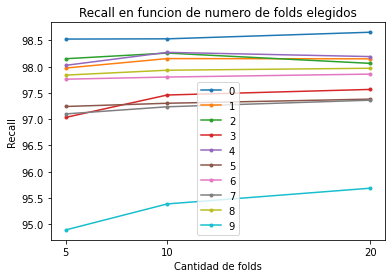

In [69]:
#Experimento 4 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
listaDeSalto = [5,10,20]
plt.plot(listaDeSalto, listaExp4PlotRec[0], 'C0.-')
plt.title("Recall en funcion de numero de folds elegidos", )
plt.xlabel("Cantidad de folds")
plt.ylabel("Recall")
#plt.xlim(5,20)
plt.xticks([5,10,20])
plt.plot(listaDeSalto, listaExp4PlotRec[1], 'C1.-')
plt.plot(listaDeSalto, listaExp4PlotRec[2], 'C2.-')
plt.plot(listaDeSalto, listaExp4PlotRec[3], 'C3.-')
plt.plot(listaDeSalto, listaExp4PlotRec[4], 'C4.-')
plt.plot(listaDeSalto, listaExp4PlotRec[5], 'C5.-')
plt.plot(listaDeSalto, listaExp4PlotRec[6], 'C6.-')
plt.plot(listaDeSalto, listaExp4PlotRec[7], 'C7.-')
plt.plot(listaDeSalto, listaExp4PlotRec[8], 'C8.-')
plt.plot(listaDeSalto, listaExp4PlotRec[9], 'C9.-')
plt.legend(('0','1','2', '3', '4','5','6','7','8','9',),loc='best')

(95.0, 100.0)

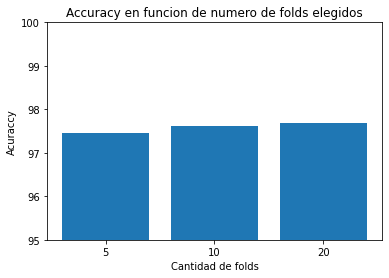

In [77]:
listaDeSalto = ['5','10','20']
listaAcc = [97.4548, 97.6095, 97.6905]
plt.bar(listaDeSalto, listaAcc)
plt.title("Accuracy en funcion de numero de folds elegidos", )
plt.xlabel("Cantidad de folds")
plt.ylabel("Acuraccy")
plt.ylim(95,100)
#plt.xlim(5,20)
#plt.xticks([5,10,20])

Text(0, 0.5, 'Accuracy')

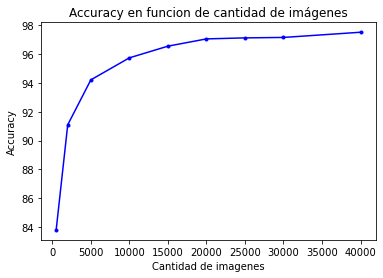

In [187]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
listaDeSalto = [500,2000,5000,10000,15000,20000,25000,30000,40000]
plt.plot(listaDeSalto, listAv(resAc), 'b.-')
plt.title("Accuracy en funcion de cantidad de imágenes")
plt.xlabel("Cantidad de imagenes")
plt.ylabel("Accuracy")

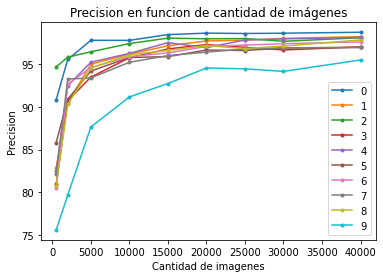

In [217]:
listaDeSalto = [500,2000,5000,10000,15000,20000,25000,30000,40000]
plt.plot(listaDeSalto, permutarListas(recallorprecPorDigito(resPrec))[0], 'C0.-')
plt.title("Precision en funcion de cantidad de imágenes", )
plt.xlabel("Cantidad de imagenes")
plt.ylabel("Precision")
plt.plot(listaDeSalto, permutarListas(recallorprecPorDigito(resPrec))[1], 'C1.-')
plt.plot(listaDeSalto, permutarListas(recallorprecPorDigito(resPrec))[2], 'C2.-')
plt.plot(listaDeSalto, permutarListas(recallorprecPorDigito(resPrec))[3], 'C3.-')
plt.plot(listaDeSalto, permutarListas(recallorprecPorDigito(resPrec))[4], 'C4.-')
plt.plot(listaDeSalto, permutarListas(recallorprecPorDigito(resPrec))[5], 'C5.-')
plt.plot(listaDeSalto, permutarListas(recallorprecPorDigito(resPrec))[6], 'C6.-')
plt.plot(listaDeSalto, permutarListas(recallorprecPorDigito(resPrec))[7], 'C7.-')
plt.plot(listaDeSalto, permutarListas(recallorprecPorDigito(resPrec))[8], 'C8.-')
plt.plot(listaDeSalto, permutarListas(recallorprecPorDigito(resPrec))[9], 'C9.-')
plt.gca().legend(('0','1','2', '3', '4','5','6','7','8','9'))

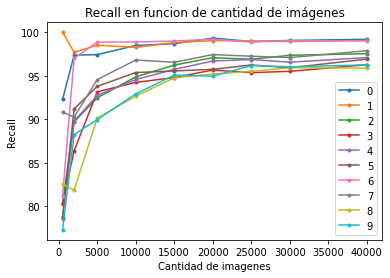

In [218]:
listaDeSalto = [500,2000,5000,10000,15000,20000,25000,30000,40000]
plt.plot(listaDeSalto, permutarListas(recallorprecPorDigito(resRec))[0], 'C0.-')
plt.title("Recall en funcion de cantidad de imágenes", )
plt.xlabel("Cantidad de imagenes")
plt.ylabel("Recall")
plt.plot(listaDeSalto, permutarListas(recallorprecPorDigito(resRec))[1], 'C1.-')
plt.plot(listaDeSalto, permutarListas(recallorprecPorDigito(resRec))[2], 'C2.-')
plt.plot(listaDeSalto, permutarListas(recallorprecPorDigito(resRec))[3], 'C3.-')
plt.plot(listaDeSalto, permutarListas(recallorprecPorDigito(resRec))[4], 'C4.-')
plt.plot(listaDeSalto, permutarListas(recallorprecPorDigito(resRec))[5], 'C5.-')
plt.plot(listaDeSalto, permutarListas(recallorprecPorDigito(resRec))[6], 'C6.-')
plt.plot(listaDeSalto, permutarListas(recallorprecPorDigito(resRec))[7], 'C7.-')
plt.plot(listaDeSalto, permutarListas(recallorprecPorDigito(resRec))[8], 'C8.-')
plt.plot(listaDeSalto, permutarListas(recallorprecPorDigito(resRec))[9], 'C9.-')
plt.gca().legend(('0','1','2', '3', '4','5','6','7','8','9'))

(400.0, 500.0)

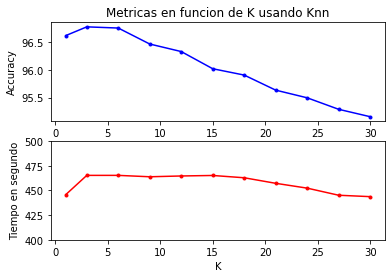

In [331]:
Saltos = [1]
for i in range(3,31,3):
    Saltos.append(i)
plt.subplot(2, 1, 1)
plt.plot(Saltos,resAcKnn1a30Prom, 'b.-')
plt.title("Metricas en funcion de K usando Knn")
plt.xlabel("K")
plt.ylabel("Accuracy")

plt.subplot(2, 1, 2)
plt.plot(Saltos,resTimeKnn1a30Prom, 'r.-')
#plt.title("Metricas en funcion de Alfas")
plt.xlabel("K")
plt.ylabel("Tiempo en segundo")
plt.ylim(400,500)

Text(0, 0.5, 'Tiempo en segundo')

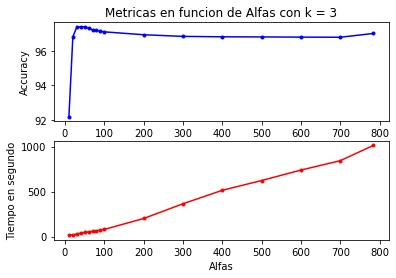

In [335]:
%matplotlib inline
import numpy as np
plt.subplot(2, 1, 1)
import matplotlib.pyplot as plt
PCASaltos = []
for i in range (10,91,10):
    PCASaltos.append(i)
for i in range(100,701,100):
    PCASaltos.append(i)
PCASaltos.append(784)
plt.plot(PCASaltos,resPromediosExpPCA[1:], 'b.-')
plt.title("Metricas en funcion de Alfas con k = 3")
plt.xlabel("Alfas")
plt.ylabel("Accuracy")

plt.subplot(2, 1, 2)
plt.plot(PCASaltos,resPromediosExpPCATime[1:], 'r.-')
#plt.title("Metricas en funcion de Alfas")
plt.xlabel("Alfas")
plt.ylabel("Tiempo en segundo")

#plt.subplot(2, 1, 2)
#plt.plot(PCASaltos100,resPromedioExpPCA100a784, 'r.-')
#plt.title("Metricas en funcion de Alfas")
#plt.xlabel("Alfas")
#plt.ylabel("Accuracy")

#plt.axis([1, 1, 0.6, 1])





Text(0, 0.5, 'Accuracy')

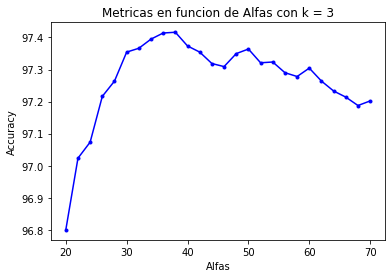

In [332]:
PCASaltos = []
for i in range(20,71,2):
    PCASaltos.append(i)

plt.plot(PCASaltos,resPromAc20a702PCA, 'b.-')
plt.title("Metricas en funcion de Alfas con k = 3")
plt.xlabel("Alfas")
plt.ylabel("Accuracy")

(90.0, 100.0)

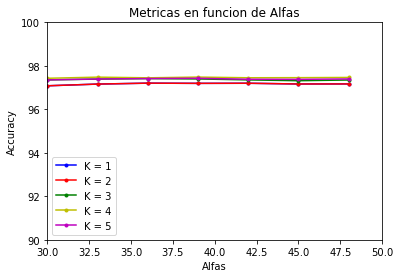

In [422]:
PCASaltos = []
for i in range(30,51,3):
    PCASaltos.append(i)

plt.subplot(1, 1, 1)
plt.plot(PCASaltos,resKAcExp3Prom[0], 'b.-')
plt.title("Metricas en funcion de Alfas")
plt.xlabel("Alfas")
plt.ylabel("Accuracy")

plt.plot(PCASaltos,resKAcExp3Prom[1], 'r.-')
#plt.title("Metricas en funcion de Alfas")
#plt.xlabel("Alfas")
#plt.ylabel("Tiempo en segundo")
#plt.legend("K=2")

plt.plot(PCASaltos,resKAcExp3Prom[2], 'g.-')
#plt.title("Metricas en funcion de Alfas")
#plt.xlabel("Alfas")
#plt.ylabel("Tiempo en segundo")
#plt.legend("K=3")

plt.plot(PCASaltos,resKAcExp3Prom[3], 'y.-')
#plt.title("Metricas en funcion de Alfas")
#plt.xlabel("Alfas")
#plt.ylabel("Tiempo en segundo")
#plt.legend("K=4")

plt.plot(PCASaltos,resKAcExp3Prom[4], 'm.-')
#plt.title("Metricas en funcion de Alfas")
#plt.xlabel("Alfas")
#plt.ylabel("Tiempo en segundo")
#plt.legend("K=5")
plt.gca().legend(('K = 1','K = 2','K = 3', 'K = 4', 'K = 5'))
plt.xlim(30,50)
plt.ylim(96,98) #con zoom
plt.ylim(90,100) #sin zoom
#plt.subplot(2, 1, 2)
#plt.plot(PCASaltos100,resPromedioExpPCA100a784Time, 'r.-')
#plt.title("Metricas en funcion de Alfas")
#plt.xlabel("Alfas")
#plt.ylabel("Tiempo en segundos")

(30.0, 50.0)

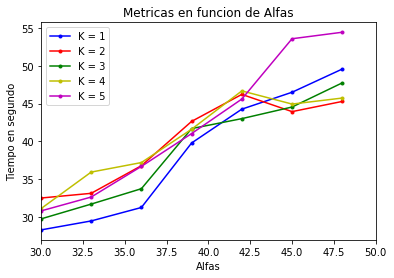

In [404]:
PCASaltos = []
for i in range(30,51,3):
    PCASaltos.append(i)

plt.subplot(1, 1, 1)
plt.plot(PCASaltos,resKTimeExp3Prom[0], 'b.-')
plt.title("Metricas en funcion de Alfas")
plt.xlabel("Alfas")
plt.ylabel("Tiempo en segundo")
plt.plot(PCASaltos,resKTimeExp3Prom[1], 'r.-')
plt.plot(PCASaltos,resKTimeExp3Prom[2], 'g.-')
plt.plot(PCASaltos,resKTimeExp3Prom[3], 'y.-')
plt.plot(PCASaltos,resKTimeExp3Prom[4], 'm.-')
plt.gca().legend(('K = 1','K = 2','K = 3', 'K = 4', 'K = 5'))
plt.xlim(30,50)

In [ ]:
import  subprocess


PCABool = '1'
k = '3' 
alpha = '5'
#epsilon = '1e-6'

comando = []

comando.append("./main")
#comando.append(cantArg)
comando.append(PCABool)
comando.append(k)
comando.append(alpha)
#comando.append(epsilon)
comando.append('train.csv')
comando.append('test.csv' )
comando.append("prueba.csv")
comando
#comando = "src/main 7 1 10 20 1e-6 ../test/train.csv ../test/test.csv prueba.csv"
result = subprocess.run (comando, stdout = subprocess.PIPE, encoding = 'ascii')
print(result.stdout.split('\n')[1]) #Print del tiempo que tardo

In [189]:
import  subprocess


PCABool = '1'
k = '1' 
alpha = '50'
epsilon = '1e-6'

comando = []

comando.append("./main")
#comando.append(cantArg)
comando.append(PCABool)
comando.append(k)
comando.append(alpha)
comando.append('trainPartido.csv')
comando.append('testPartido.csv' )
comando
#comando = "src/main 7 1 10 20 1e-6 ../test/train.csv ../test/test.csv prueba.csv"
result = subprocess.run (comando, stdout = subprocess.PIPE, encoding = 'ascii')

In [22]:
import csv
OutCsv = open("../test/prueba.csv")
expected = open("../test/submission100.csv")

OutCsvRead = csv.reader(OutCsv)
expectedRead = csv.reader(expected)

header = []
header = next(expectedRead)
next(OutCsvRead)

vExp = []
vOutCsv = []

for i in expectedRead:
    vExp.append(i[1])
    
for i in OutCsvRead:
    vOutCsv.append(i)
    
res = 0
i = 0
while i < len(vExp):
    if vExp[i] == vOutCsv [i][1]:
        res = res + 1
    i = i + 1
n = (res/i) * 100

n

StopIteration: 

In [ ]:
#-----------------------------Comentarios viejos---------------------------------- 

# -------------------------Celda de lectura de Train --------------------------------
#YLabelsTodo = []
#i = 0
#while i < len(XTrainTodo):
 #   YLabelsTodo.append(XTrainTodo[i][0]) #Pongo los labels en una posicion aparte
  #  i=i+1
#i = 0 
#while i < len(XTrainTodo):
 #   XTrainTodo[i].pop(0)
  #  i = i +1


#---------------------------------Celda de Kfold--------------------------------
#k = len(XTrainParticion)
#kfld = 5
#resKAc = []
#resKTime = []

#resAc = []
#resTime = []
#resPrec = []
#resRec = []

#listaDeSalto = [500,2000,5000,10000,15000,20000,25000,30000,40000]

#for x in listaDeSalto:
 #   xTrainParticion = XTrainTodo[:x]
  #  tempAc, tempTime, tempPrec, tempRec = kfold(xTrainParticion,5,4,1,38)
   # resAc.append(tempAc)
   # resTime.append(tempTime)
   # resPrec.append(tempPrec)
   # resRec.append(tempRec)
#print(k)
#print(XTrainTodo)


    
#tip: usar multiplos de 42000 no seas gil
#for m in range(3,31,3):
 #   tempAc, tempTime = kfold(5,m,0)
  #  resAc.append(tempAc)
   # resTime.append(tempTime)

    

#for nk in range (1,6,1):
 #   resAc = []
  #  resTime = []
   # for alpha in range(30,51,3):
    #    tempAc, tempTime = kfold(kfld,nk,1,alpha)
     #   resAc.append(tempAc)
      #  resTime.append(tempTime)
   # resKAc.append(resAc)
   # resKTime.append(resTime)
#resAc, resTime = kfold(5,1,0,50)